GONZAGA DOS SANTOS Michel
<br>
Master SSTIM

## 1. The dataset

### NYC Property Sales: A year's worth of properties sold on the NYC real estate market

The nyc-rolling-sales.csv.zip (2 Mb) is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period from September 2016 to September 2017. It contains the following features:

* ** (1) Borough: (N)** The name of the borough in which the property is located. A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* ** (2) Neighborhood: (S)** Department of Finance assessors determine the neighborhood name in the course of valuing properties. The common name of the neighborhood is generally the same as the name Finance designates. However, there may be slight differences in neighborhood boundary lines and some sub-neighborhoods may not be included. 
* ** (3) Building Class Category: (S)** This is a field that we are including so that users of the Rolling Sales Files can easily identify similar properties by broad usage (e.g. One Family Homes) without looking up individual Building Classes. Files are sorted by Borough, Neighborhood, Building Class Category, Block and Lot.
* ** (4) Tax Class at Present: (N)** Every property in the city is assigned to one of four tax classes (Classes 1, 2, 3, and 4), based on the use of the property.
    * *Class 1:* Includes most residential property of up to three units (such as one-, two-, and three-family homes and small stores or offices with one or two attached apartments), vacant land that is zoned for residential use, and most condominiums that are not more than three stories.
     * *Class 2:* Includes all other property that is primarily residential, such as cooperatives and condominiums.
     * *Class 3:* Includes property with equipment owned by a gas, telephone or electric company.
     * *Class 4:* Includes all other properties not included in class 1,2, and 3, such as offices, factories, warehouses, garage buildings, etc.
* ** (5) Block: (N)** A Tax Block is a sub-division of the borough on which real properties are located. The Department of Finance uses a Borough-Block-Lot classification to label all real property in the City. “Whereas” addresses describe the street location of a property, the block and lot distinguishes one unit of real property from another, such as the different condominiums in a single building. Also, block and lots are not subject to name changes based on which side of the parcel the building puts its entrance on. 
* ** (6) Lot: (N)** A Tax Lot is a subdivision of a Tax Block and represents the property unique location. The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* ** (7) Easement: (S)** An easement is a right, such as a right of way, which allows an entity to make limited use of another’s real property. For example: MTA railroad tracks that run across a portion of another property. 
* ** (8) Building Class at Present: (S)** The Building Classification is used to describe a property’s constructive use. The first position of the Building Class is a letter that is used to describe a general class of properties (for example “A” signifies one-family homes, “O” signifies office buildings. “R” signifies condominiums). The second position, a number, adds more specific information about the property’s use or construction style (using our previous examples “A0” is a Cape Cod style one family home, “O4” is a tower type office building and “R5” is a commercial condominium unit). The term Building Class used by the Department of Finance is interchangeable with the term Building Code used by the Department of Buildings.
* ** (9) Address: (S)** The street address of the property as listed on the Sales File. Coop sales include the apartment number in the address field. 
* ** (10) Apartement Number (S)**
* ** (11) Zip Code: (N)** The property’s postal code 
* ** (12) Residential Units: (N)** The number of residential units at the listed property.
* ** (13) Commercial Units: (N)** The number of commercial units at the listed property.
* ** (14) Total Units: (N)** The total number of units at the listed property.
* ** (15) Land Square Feet: (N)** The land area of the property listed in square feet.
* ** (16) Gross Square Feet: (N)** The total area of all the floors of a building as measured from the exterior surfaces of the outside walls of the building, including the land area and space within any building or structure on the property. 
* ** (17) Year Built: (N)** Year the structure on the property was built. 
* ** (18) Tax Class at Time of Sale (N)**
* ** (19) Building Class at Time of Sale: (S)** 
* ** (20) Sales Price: (N)** Price paid for the property. A $0$ sale indicates that there was a transfer of ownership without a cash consideration. There can be a number of reasons for a $0$ sale including transfers of ownership from parents to children. 
* ** (21) Sale Date: (D)** Date the property sold.

Note: (N): number, (S): string, (D): date


## Work to do

* 1. Read the dataset

* 2. Clean the data

* 3. Select the target feature (selling price) and eliminate the item with 10 % ower value and the 10 % higher value

* 4. Select 3 features

* 5. Based on the various elements seen in the course, propose a model to predict the selling price based on three characteristics that you will have selected a priori.

* 6. Evaluate your model and comment it.

In [61]:
#Importing the libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cross_validation import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [62]:
path_to_file = "C:/Users/miche/Documents/data mining/regression/nyc-rolling-sales.csv"
data = pd.read_csv(path_to_file)
dim_data = data.shape
data.head()
# Take a look at the first few rows

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


- Features Selection:
<br>
<br>
This part of the TD concerns to the choice of the features. The selected ones were:
<br>
<br>
 - Total Units: Sice the number of given product can be affected by the number of available units, it seems plausible to consider that this feature would somehow afect the Sales price features.
 <br>
 - Grosse Square Features: The total area of a House is a derteminant factor in sales prices, normally the greatter the area the greatter will be the price. 
 <br>
 - Year Built: Olds and New houses usually don't have the same price.

In [63]:
# Here we creat a Features Matrix selecting tree features to predict the target feature 
# Sales Prices:
# - Total units
# - Grosse Square Features
# - Year Built
X = data.iloc[:,[14,16,17]].values
y = data.iloc[:,[20]].values


- In this part we start the data preprocessing stage, it is really important to ensure better results. As a first step we are going to deal with missing values in the data set. Missing values in this data set can be represented as NaN or ' -  ', so we need to ensure the all the missing values are represented as the same way(NaN).

In [64]:
dim = X.shape
for j in range(dim[1]):
    a =X[:,j]
    for i in range(len(a)):
        if a[i] == ' -  ':
            a[i] = np.nan
for d in y:
    if d[0] == ' -  ':
        d[0] = np.nan
    else:
        d[0] = int(d[0])

Before dealing with the missing values we are going to drop the duplicates

In [65]:
df = np.concatenate((X, y),axis=1)
df = pd.DataFrame(df,columns = ['Total Unist', 'Grosse square Feet','Year Built','SalesPrice'])
df = df.drop_duplicates(subset=None, keep='first', inplace=False)

In [66]:
df.head()

,Total Unist,Grosse square Feet,Year Built,SalesPrice
0,5,6440,1900,6625000
1,31,18690,1900,NaN
2,17,7803,1900,NaN
3,10,6794,1913,3936272
4,6,4615,1900,8000000


Here we count the number of missing values present in all the colums of the new data set df:

In [67]:
df.isnull().sum()

Total Unist               0
Grosse square Feet    17291
Year Built                0
SalesPrice             6967
dtype: int64

Given that we have a large amount of missing data in Grosse square Feet and SalesPrice, simply input the missing valeus with the mean, migth not be a good a idea, so we  decided to delet the lines with missing values 

In [68]:
F = df.iloc[:,[0,1,2,3]].values
vec = df.iloc[:,[1]].values
y = df.iloc[:,[3]].values
y = y.tolist()
vec = vec.tolist()

F.shape
ind = []
for i in range(len(vec)):
    if isinstance(vec[i][0],float):
        ind.append(i)

In [69]:
df1 = np.delete(F, ind, 0)
df1.shape

(48197, 4)

In [70]:
df1 = pd.DataFrame(df1,columns = ['Total Unist', 'Grosse square Feet','Year Built','SalesPrice'])
df1.isnull().sum()

Total Unist              0
Grosse square Feet       0
Year Built               0
SalesPrice            6745
dtype: int64

In [71]:
F = df1.iloc[:,[0,1,2,3]].values
y = df1.iloc[:,[3]].values
y = y.tolist()
ind1 = [] 
s = 0
for i in range(len(y)):
    if isinstance(y[i][0],float):
        s = s + 1 
        ind1.append(i)

df2 = np.delete(F, ind1, 0)
df2.shape

(41452, 4)

Here as we can see we have no loger missing values in the data set

In [72]:
df2 = pd.DataFrame(df2,columns = ['Total Unist', 'Grosse square Feet','Year Built','SalesPrice'])
df2.isnull().sum()

Total Unist           0
Grosse square Feet    0
Year Built            0
SalesPrice            0
dtype: int64

Here we select the target feature (selling price) and eliminate the item with 10 % ower value and the 10 % higher value, using the function np.percentile


In [73]:
P = np.percentile(df2['SalesPrice'], [10, 90])
df2 = df2[(df2['SalesPrice'] > P[0]) & (df2['SalesPrice'] < P[1])]
print(P)
# Transform df2 into an array A1
A1 = df2.iloc[:,:].values
# Will be used in the neural network part
X1 = df2.iloc[:,:-1].values
y1 = df2.iloc[:,3].values

[0.0 1560000.0]


Here we convert the second column of A1 and X1 to int, since its elements were from the type string

In [74]:
val = A1[:,1]
for i in range(len(val)):
    A1[i,1] = int(val[i])
val = X1[:,1]
for i in range(len(val)):
    X1[i,1] = int(val[i])

All elements are from the same type now

In [75]:
X1

array([[1, 5653, 1900],
       [9, 6330, 1901],
       [9, 6330, 1901],
       ...,
       [2, 2377, 1998],
       [2, 1496, 1925],
       [1, 2400, 2006]], dtype=object)

In order to obtain better results while performing linear regression, we are going to apply a log transformation in the data set 

In [76]:
val = A1[:,0]

for i in range(len(val)):
    if val[i] != 0:
        A1[i,0] = np.log(val[i])

        
val = A1[:,1]

for i in range(len(val)):
    if val[i] != 0:
        A1[i,1] = np.log(val[i])

val = A1[:,2]

for i in range(len(val)):
    if val[i] != 0:
        A1[i,2] = np.log(val[i])
        
val = A1[:,2]

for i in range(len(val)):
    if val[i] != 0:
        A1[i,3] = np.log(val[i])

Then in order to have all the variables with the same scale we apply a Standard scale in the whole data set

In [77]:
scaler = StandardScaler() 
scaler.fit(A1) 
A1 = scaler.transform(A1)

C:\Users\miche\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\miche\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [78]:
A = pd.DataFrame(A1,columns = ['Total Unist', 'Grosse square Feet','Year Built','SalesPrice'])
X = A.iloc[:,:-1].values
y = A.iloc[:,3].values

Given that we have already perform the data prepocessing, we are now able to split the data set into train and test sets

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [80]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

# Predict data of estimated models
y_pred = lr.predict(X_test)

Here we compare the values of the predictions, by means of the mae, mse and the Variance score

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(y_pred[:5], y_test[:5])
print('Coefficients: \n', lr.coef_)
print("mae: %.4f"% mean_absolute_error(y_test, y_pred))
print("mse: %.4f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

[-0.12471059 -0.12677823 -0.1317771   4.99647552 -0.14906028] [-0.13814015 -0.13814015 -0.13814013 11.81490645 -0.13814011]
Coefficients: 
 [-0.00285177 -0.0017034  -0.84052318]
mae: 0.0923
mse: 0.3065
Variance score: 0.66


# Multilayer Perceptron
<br>
<br> Now we are intend to prefrom the same linear regression using a MLP(Multilayer Perceptron). we are going to use the tools privided by Keras, and tensor flow

In [83]:
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Here we pre pare the data to be used to build the regression model

In [100]:
y1=np.reshape(y1, (-1,1))
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1)
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)
y_train1 = scaler.fit_transform(y_train1)
y_test1 = scaler.transform(y_test1)

C:\Users\miche\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\miche\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\miche\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\miche\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\miche\AppData\Local\Continuum\a

In [105]:
np.random.seed(10)
model = Sequential()

model.add(Dense(128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3)) 
model.add(Dense(1, kernel_initializer = 'uniform'))
model.compile(optimizer = 'sgd', loss = 'mean_squared_error',metrics=['accuracy'])        # metrics=['mse','mae']
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=500)  # ignored
history_mse = model.fit(X_train1, y_train1, epochs = 100, callbacks = [early_stopping_monitor], verbose = 1, validation_split = 0.2)

print('Loss:    ', history_mse.history['loss'][-1], '\nVal_loss: ', history_mse.history['val_loss'][-1])

Train on 18859 samples, validate on 4715 samples
Epoch 1/100
18859/18859 [==============================] - 1s 38us/step - loss: 0.4139 - acc: 0.0000e+00 - val_loss: 0.3395 - val_acc: 0.0000e+00
Epoch 2/100
18859/18859 [==============================] - 1s 29us/step - loss: 0.3207 - acc: 0.0000e+00 - val_loss: 0.3451 - val_acc: 0.0000e+00
Epoch 3/100
18859/18859 [==============================] - 1s 27us/step - loss: 0.3252 - acc: 0.0000e+00 - val_loss: 0.3343 - val_acc: 0.0000e+00
Epoch 4/100
18859/18859 [==============================] - 1s 27us/step - loss: 0.3201 - acc: 0.0000e+00 - val_loss: 0.3386 - val_acc: 0.0000e+00
Epoch 5/100
18859/18859 [==============================] - 1s 28us/step - loss: 0.3183 - acc: 0.0000e+00 - val_loss: 0.3343 - val_acc: 0.0000e+00
Epoch 6/100
18859/18859 [==============================] - 1s 27us/step - loss: 0.3179 - acc: 0.0000e+00 - val_loss: 0.3501 - val_acc: 0.0000e+00
Epoch 7/100
18859/18859 [==============================] - 1s 28us/step - l

18859/18859 [==============================] - 1s 27us/step - loss: 0.3220 - acc: 0.0000e+00 - val_loss: 0.3357 - val_acc: 0.0000e+00
Epoch 57/100
18859/18859 [==============================] - 1s 27us/step - loss: 0.3210 - acc: 0.0000e+00 - val_loss: 0.3401 - val_acc: 0.0000e+00
Epoch 58/100
18859/18859 [==============================] - 0s 26us/step - loss: 0.3197 - acc: 0.0000e+00 - val_loss: 0.3359 - val_acc: 0.0000e+00
Epoch 59/100
18859/18859 [==============================] - 1s 27us/step - loss: 0.3232 - acc: 0.0000e+00 - val_loss: 0.3355 - val_acc: 0.0000e+00
Epoch 60/100
18859/18859 [==============================] - 0s 26us/step - loss: 0.3197 - acc: 0.0000e+00 - val_loss: 0.3358 - val_acc: 0.0000e+00
Epoch 61/100
18859/18859 [==============================] - 0s 26us/step - loss: 0.3214 - acc: 0.0000e+00 - val_loss: 0.3405 - val_acc: 0.0000e+00
Epoch 62/100
18859/18859 [==============================] - 1s 27us/step - loss: 0.3190 - acc: 0.0000e+00 - val_loss: 0.3454 - val_

In [103]:
# EVALUATE MODEL IN THE TEST SET
score_mse_test = model.evaluate(X_test1, y_test1)
print('Test Score:', score_mse_test)

# EVALUATE MODEL IN THE TRAIN SET
score_mse_train = model.evaluate(X_train1, y_train1)
print('Train Score:', score_mse_train)

7859/7859 [==============================] - 0s 15us/step
Test Score: [0.3942123311237596, 0.0]
23574/23574 [==============================] - 0s 13us/step
Train Score: [0.32727199547047536, 0.0]


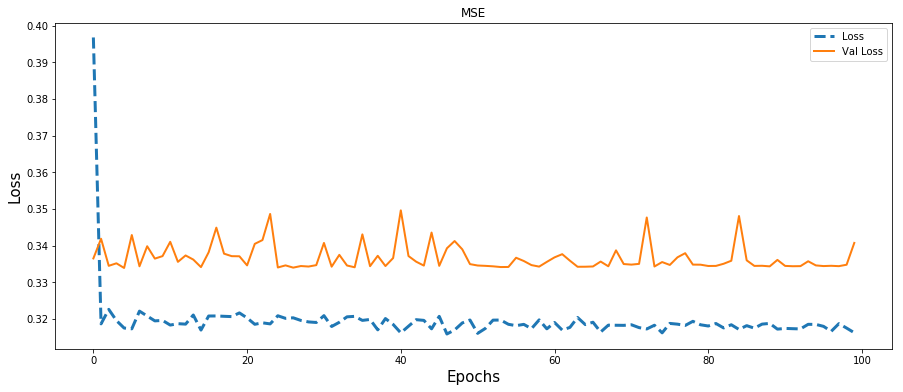

In [104]:
plt.figure(figsize=(15, 6))
plt.plot(history_mse.history['loss'], lw =3, ls = '--', label = 'Loss')
plt.plot(history_mse.history['val_loss'], lw =2, ls = '-', label = 'Val Loss')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.title('MSE')
plt.legend()